In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
class Calculate_heading_gps:
    def __init__(self):

        # List of distance between waypoints
        self.dist_wp2wp=[]
        # List of UTM waypoints
        self.utm_point =[]
        # List of waypoints
        self.waypoint  =[]

        # Load waypoints from gps_path
        # calculate distance between waypoints
        self.load_start_end_point()

        # self.bearing=self.calculate_bearing(self.utm_point1,self.utm_point2)

    def load_start_end_point(self):
        # file path
#         file_path='/content'
        file_name='kcity_final_parking_lot1_return_fixed'

        # write_name='kcityHighwayFixed'

#         full_path=file_path+'/'+file_name+'.txt'
        full_path=file_name+'.txt'
        # write_path=file_path+'/'+write_name+'txt'

        f=open(full_path,'r')
        # fw=open(write_path,'w')

        lines=f.readlines()

        for i,line in enumerate(lines):
            if i < len(lines)-1:
                first_line=lines[i]
                second_line=lines[i+1]
                utm1=[float(tmp) for tmp in first_line.split()]
                utm2=[float(tmp) for tmp in second_line.split()]

                utm1x=utm1[0];utm1y=utm1[1]
                utm2x=utm2[0];utm2y=utm2[1]

                diff_x=utm2x-utm1x; diff_y=utm2y-utm1y
                dist_wp2wp=np.sqrt(diff_x**2+diff_y**2)


                # Modify gaps between waypoints
                # We define 0.5m, but this code defines 2m
                if dist_wp2wp > 2:
                  self.waypoint.append(i)
                generate_num=int(dist_wp2wp/0.5)

                self.dist_wp2wp.append(dist_wp2wp)
                self.utm_point.append([utm1x,utm1y])

                # generate_wp_x=np.linspace(utm1x, utm2x, generate_num)
                # generate_wp_y=np.linspace(utm1y, utm2y, generate_num)



            else:
                end_line=lines[-1]
                utm_end=[float(tmp) for tmp in first_line.split()]





    def calculate_bearing(self,utm1, utm2):
        """
        Calculate the bearing between two UTM points.

        Parameters:
        - utm1: tuple, the first point (easting, northing)
        - utm2: tuple, the second point (easting, northing)

        Returns:
        - float, the bearing in degrees from the north
        """
        delta_easting = utm2[0] - utm1[0]
        delta_northing = utm2[1] - utm1[1]

        angle = math.atan2(delta_northing, delta_easting)

        # Convert from radians to degrees and ensure result is in [0, 360]
        bearing = angle
        return bearing

# 예시
# utm_point1 = (326605.0586525993, 4128020.334594697)
# utm_point2 = (326602.0908387125, 4128014.7466568165)

if __name__=='__main__':
    # try:
      bearing=Calculate_heading_gps()
        # print(f"The bearing from point1 to point2 is: {math.degrees(bearing.bearing)}°")
    # except :
    #     print("Error in Calculating")

# utm_point1,utm_point2=load_start_end_point()

# bearing = calculate_bearing(utm_point1, utm_point2)
# print(f"The bearing from point1 to point2 is: {bearing}°")

FileNotFoundError: [Errno 2] No such file or directory: 'kcity_final_parking_lot1_return_fixed.txt.txt'

In [3]:
print(f'최소 : {np.min(bearing.dist_wp2wp)}, 평균 : {np.mean(bearing.dist_wp2wp)}, 최대 : {np.max(bearing.dist_wp2wp)}')

최소 : 0.5000002267862943, 평균 : 0.5968284540740305, 최대 : 1.075587935495891


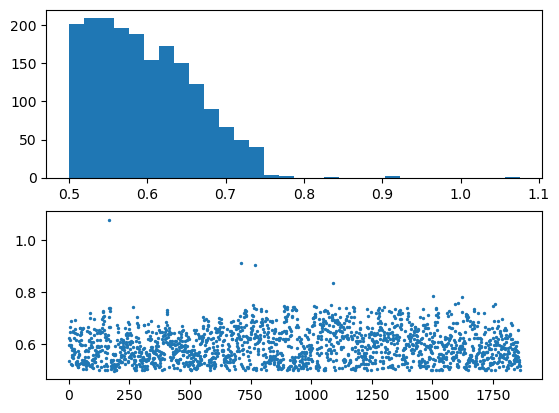

In [4]:

plt.subplot(2,1,1)
plt.hist(bearing.dist_wp2wp,bins=30);

plt.subplot(2,1,2)
plt.scatter(range(len(bearing.dist_wp2wp)),bearing.dist_wp2wp,s=2)

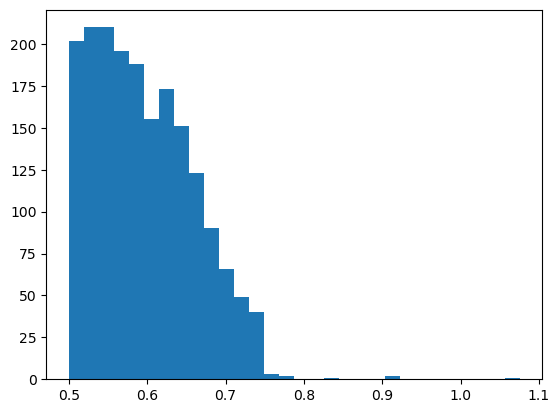

In [5]:
import matplotlib.pyplot as plt

plt.hist(bearing.dist_wp2wp,bins=30);

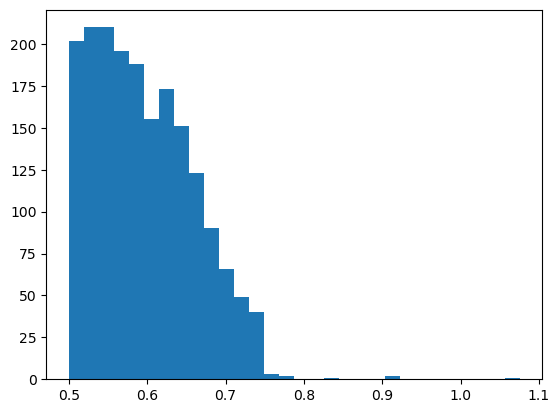

In [6]:
import matplotlib.pyplot as plt

plt.hist(bearing.dist_wp2wp,bins=30);

(302442.30767189304, 302611.8088242373, 4123674.890195656, 4124153.4868532694)

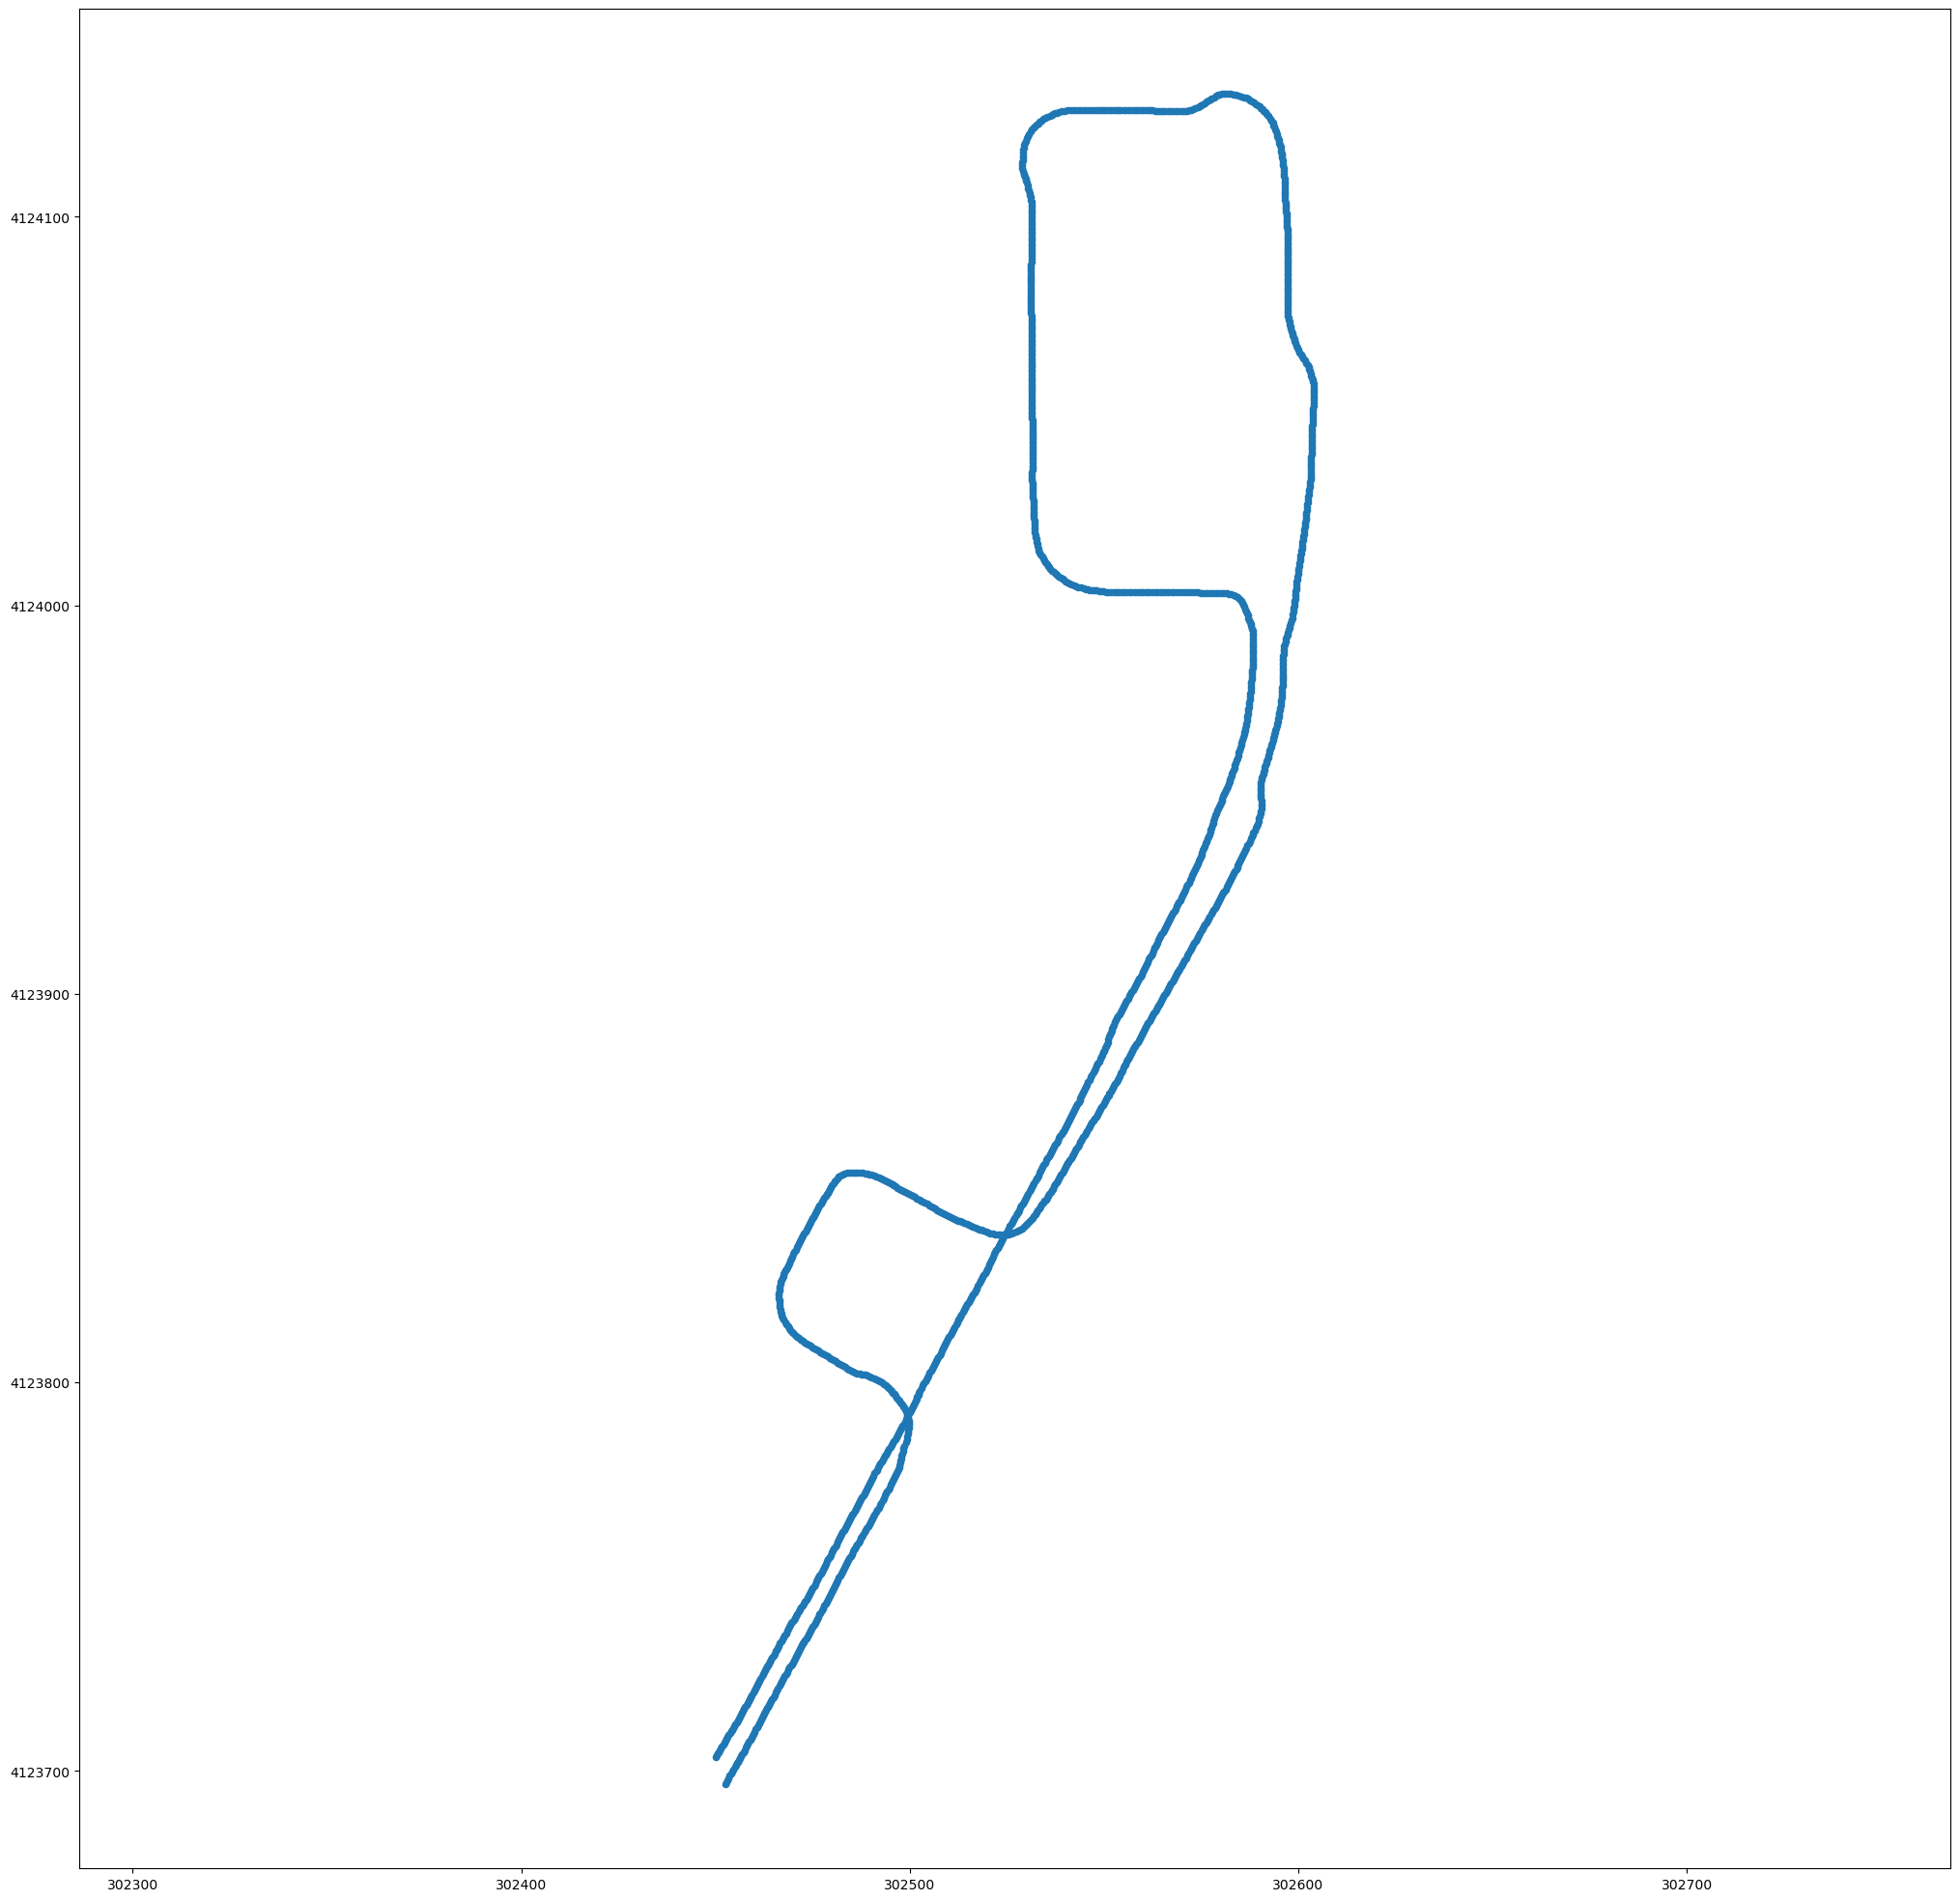

In [7]:
wp_highway=np.array(bearing.utm_point)

plt.figure(figsize=(25, 25))
plt.scatter(wp_highway[:,0],wp_highway[:,1],s=20);
plt.axis('equal')


In [8]:
np.max(bearing.dist_wp2wp), np.min(bearing.dist_wp2wp), np.average(bearing.dist_wp2wp)

(1.075587935495891, 0.5000002267862943, 0.5968284540740305)